In [ ]:
import sys
sys.path.insert(0,'..')

In [2]:
import numpy as np
from vectors import *;
from draw3d import *;
from draw2d import *;

dino_vectors = [
    (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

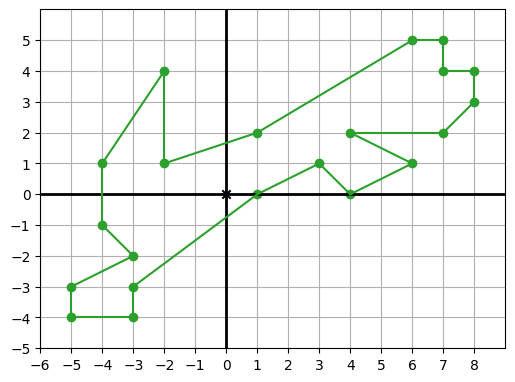

In [8]:
rotateI = (-1,0)
rotateJ = (0,1) 

shearI = (1,0)
shearJ = (1,1)

'''
|-1 0|  |1 1|
|0  1|  |0 1|
'''

def apply_transformation(i_hat, j_hat, coord):
    (x,y) = coord
    return add(scale(x, i_hat), scale(y, j_hat))

# long form of transformation 
# apply first transformation to all vertices
# apply second transformation to all vertices

dinoRotated = [apply_transformation(rotateI, rotateJ, coord) for coord in  dino_vectors]
dinoRotatedAndSheer = [apply_transformation(shearI, shearJ, coord) for coord in  dinoRotated]


# short form of transformation
# combine the transformations into one matrix 
# then apply that matrix to all vertices


def combine_transformations(transformation_first, transformation_second):
    (i_hat, j_hat) = transformation_first
    (i_hat_2, j_hat_2) = transformation_second

    first_column = apply_transformation(i_hat_2, j_hat_2, i_hat)
    second_column = apply_transformation(i_hat_2, j_hat_2, j_hat)
    return (first_column, second_column)


(composition_i, composition_j) = combine_transformations((rotateI, rotateJ), (shearI, shearJ))

dinoComposition = [apply_transformation(composition_i, composition_j, coord) for coord in  dino_vectors]

draw2d(
    Points2D(*dinoComposition, color=green),
    Polygon2D(*dinoComposition, color=green),
)